## Manual Imports 

In [1]:
!pip install --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cpu


In [2]:
!pip install transformers==4.28.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.6 MB/s eta 0:00:00


In [3]:
# run this cell, then restart the runtime before continuing
#!pip install git+https://github.com/joeddav/transformers
!pip install nlp
#!pip install transformers==4.15.0 # Esto lo puse porque la última versión de transformers, la 4.27.0 rompe con otro paquete.
!tar -xzvf pytorch_weights.tar.gz
!mv config.json pytorch/.
!mv vocab.txt pytorch/.
!pip install ray[tune]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.3 MB/s eta 0:00:00
tar (child): pytorch_weights.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
mv: cannot stat 'config.json': No such file or directory
mv: cannot stat 'vocab.txt': No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.1 MB/s eta 0:00:00
     ━━━━

In [4]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import packages

In [6]:
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [7]:
from nlp import load_dataset
import torch
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,f1_score
from sklearn.model_selection import train_test_split
import pickle
import html
from html import unescape
import re
import random
import matplotlib.pyplot as plt
import itertools

In [8]:
random.seed(10)

In [9]:
path = "/content/gdrive/Mi Unidad/Tesis_Maestria/"

In [10]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [11]:
def finetune(train,val,epoc,lr, output_file_path=None):
    training_args = TrainingArguments(
      output_dir='./results',
      num_train_epochs=epoc,
      per_device_train_batch_size=10, ## pick the biggest batch size we can fit
      per_device_eval_batch_size=10,
      warmup_steps=500,
      weight_decay=0.01,
      learning_rate = lr,#2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
      logging_dir='./logs',
      seed = 123)

    trainer = Trainer(
      model=model,
      args=training_args,
      compute_metrics=compute_metrics,
      train_dataset=train,
      eval_dataset=val
  )

    trainer.train()
    if output_file_path is not None:
        print('saving model to ',output_file_path)
        model.save_pretrained(output_file_path)
        tokenizer.save_pretrained(output_file_path)

    return trainer.evaluate()

In [12]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    f1_macro = f1_score(labels, preds, average='macro')
    return {
        'accuracy': acc,
        'f1': f1,
        'f1 macro': f1_macro,
        'precision': precision,
        'recall': recall
    }

# Training

## Prepare data

In [13]:
class TrainDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [14]:
path = "/content/gdrive/MyDrive/Tesis_Maestria/"

In [15]:
train = pd.read_excel(path + "data/transformer_input.xlsx", sheet_name = 'train')
val_data = pd.read_excel(path + "data/transformer_input.xlsx", sheet_name = 'val')
test_data = pd.read_excel(path + "data/transformer_input.xlsx", sheet_name = 'test')
adversarial = pd.read_excel(path + "data/transformer_input.xlsx", sheet_name = 'adversarial')
train_arg = pd.read_excel(path + "data/transformer_input.xlsx", sheet_name = 'argentina')#, encoding='utf-8')

In [16]:
print('Train data',train.shape)
print('Validation',val_data.shape)
print('Test',test_data.shape)
print('Adversarial',adversarial.shape)
print('Argentina',train_arg.shape)

Train data (5896, 4)
Validation (1124, 4)
Test (1980, 4)
Adversarial (1639, 3)
Argentina (1801, 4)


In [17]:
train_data = train_arg.append([train]) 
train_data.head()

<ipython-input-17-e9944f069bc4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_arg.append([train])


,id,replaced_text,abuse,seed_target,round
0,id_1435451994718842881,@Politica_token Es un absurdo monumental inclu...,0,1.0,NaN
1,id_1435450898772279296,@Politica_token dejá de gastar dinero del esta...,1,1.0,NaN
2,id_1435450009412153345,@Politica_token @USER @Politica_token @USER Ra...,1,1.0,NaN
3,id_1435449210862809093,Goce y disfrute. Tenemos récord de muertos por...,1,1.0,NaN
4,id_1435445822930530304,@Politica_token @USER @Politica_token @USER Se...,0,1.0,NaN


In [18]:
train_data.abuse = train_data.abuse.astype(int)
val_data.abuse = val_data.abuse.astype(int)
test_data.abuse = test_data.abuse.astype(int)

In [19]:
train_data.shape

(7697, 5)

In [20]:
val_data.shape

(1124, 4)

In [21]:
import emoji
import re


user_regex = re.compile(r"@[a-zA-Z0-9_]{0,15}")
url_regex = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
)

hashtag_regex = re.compile(r'\B#(\w*[a-zA-Z]+\w*)')
start_of_camel = re.compile(r'([A-Z]+)')


def camel_to_human(s, lower=True):
    """
    Converts camel case to 'human' case

    Arguments:
    ----------

    lower: bool (default: False)
        Convert output to lower
    """

    ret = start_of_camel.sub(r' \1', s).strip()

    if lower:
        ret = ret.lower()

    return ret


emoji_regex = re.compile(r"\|([^\|]+)\|")


def convert_emoji_to_text(x, emoji_wrapper="emoji"):
    """
    Converts emoji to text
    """
    wrapper = f" {emoji_wrapper} ".replace("  ", " ")
    return wrapper + " ".join(x.groups()[0].split("_")) + wrapper


replacements = {
    "~": None,
    "£": None,
    "¥": None,
    "¨": '"',
    "©": None,
    "«": '"',
    "°": None,
    "´": None,
    "¶": None,
    "·": None,
    "º": None,
    "»": '"',
    "×": None,
    "ا": None,
    "–": None,
    "—": None,
    "‘": None,
    "’": None,
    "“": '"',
    "”": '"',
    "•": None,
    "…": None,
    "‼": "!",
    "€": "$",
    "™": None,
    "●": None,
    "☠": None,
    "☹": None,
    "☺": None,
    "☻": "😃",
    "♀": None,
    "♂": None,
    "♡": "❤️",
    "♥": "❤️",
    "⚰": None,
    "⛱": None,
    "⛹": None,
    "✈": None,
    "✓": None,
    "❤": None,
    "ー": None,
    "🕯": None,
    "🛰": None,
}

laughter_conf = {
    "es": {
        "regex": re.compile("[ja][ja]+aj[ja]+"),
        "replacement": "jaja",
    },
    "en": {
        "regex": re.compile("[ha][ha]+ah[ha]+"),
        "replacement": "haha",
    },
    "it": {
        "regex": re.compile("[ha][ha]+ah[ha]+"),
        "replacement": "haha",
    },

    "pt": {
        "regex": re.compile("[ha][ha]+ah[ha]+|kk+"),
        "replacement": "kk",
    }
}

default_args = {
    "es": {
        #"user_token": "@usuario",
        "url_token": "url",
        "hashtag_token": "hashtag",
    },

    "en": {
        "user_token": "@USER",
        "url_token": "HTTPURL",
        "hashtag_token": "hashtag",
    },

    "it": {
        "user_token": "##user",
        "url_token": "##url",
        "hashtag_token": "##hashtag",
    },

    "pt": {
        "user_token": "@USER",
        "url_token": "HTTPURL",
        "hashtag_token": "hashtag",
    }
}


special_tokens = {
    k: list(v.values()) for k, v in default_args.items()
}

model_preprocessing_args = {
    "pysentimiento/robertuito-base-uncased": default_args["es"],
    "pysentimiento/robertuito-base-cased": default_args["es"],
    "pysentimiento/robertuito-base-deacc": default_args["es"],
    "melll-uff/bertweetbr": default_args["en"],  # Same as BERTweet
}


def get_preprocessing_args(model_name, lang):
    """
    Gets preprocessing args for model_name and lang

    Returns default_args[lang] if model_name has not special params
    """
    return model_preprocessing_args.get(model_name, default_args[lang])


def preprocess_tweet(
        text, lang="es", user_token=None, url_token=None, preprocess_hashtags=True, hashtag_token=None, char_replace=True,
        demoji=True, shorten=3, normalize_laughter=True, emoji_wrapper="emoji", preprocess_handles=True):
    """
    Basic preprocessing

    Arguments:
    ---------

    text: str
        Text to preprocess

    lang: str (default 'es')
        Language used in the preprocessing. This is used for the demoji functionality and laughter preprocessing

    user_token: str (default "[USER]")
        Token used to replace user handles

    url_token: str (default "[URL]")
        Token used to replace urls

    preprocess_hashtags: boolean (default True)
        If true, applies preprocessing to hashtag, trying to split camel cases

    hashtag_token: str (default None)
        If preprocess_hashtags is True, adds hashtag_token before the preprocessed content of the hashtag

    shorten: int (default: 3)
        If not none, all occurrences of shorten or more characters are cut to this number

    char_replace: bool (default: True)
        If true, replaces or removes special characters to equivalent ones.

    demoji: boolean (default True)
        If true, converts emoji to text representations using `emoji` library, and wraps this with "emoji" tokens

    normalize_laughter: boolean (default True)
        Normalizes laughters. Uses different regular expressions depending on the lang argument.

    preprocess_handles: boolean (default True)
        If true, replaces user handles with user_token
    """

    #user_token = user_token or default_args[lang]["user_token"]
    url_token = url_token or default_args[lang]["url_token"]
    hashtag_token = hashtag_token or default_args[lang]["hashtag_token"]

    def process_hashtags(x):
        """
        Hashtag preprocessing function

        Take first group and decamelize
        """

        text = x.groups()[0]

        text = camel_to_human(text)

        if hashtag_token:
            text = hashtag_token + " " + text

        return text

    if preprocess_hashtags:
        text = hashtag_regex.sub(
            process_hashtags,
            text
        )

    if char_replace:
        ret = ""
        for char in text:
            if char in replacements:
                replacement = replacements[char]
                if replacement:
                    ret += replacement
            else:
                ret += char
        text = ret

    #if preprocess_handles:
        #text = user_regex.sub(user_token, text)

    text = url_regex.sub(url_token, text)

    if shorten:
        repeated_regex = re.compile(r"(.)" + r"\1" * (shorten-1) + "+")
        text = repeated_regex.sub(r"\1"*shorten, text)

    if demoji:
        text = emoji.demojize(text, language=lang, delimiters=("|", "|"))
        text = emoji_regex.sub(
            lambda x: convert_emoji_to_text(x, emoji_wrapper=emoji_wrapper),
            text
        )

    if normalize_laughter:
        laughter_regex = laughter_conf[lang]["regex"]
        replacement = laughter_conf[lang]["replacement"]

        text = laughter_regex.sub(
            replacement,
            text
        )

    return text.strip()

In [22]:
#Ejemplo de texto con emoji y hashtag
train_data['replaced_text'][13]

13      @Politica_token esta desquiciada sos vos? [URL]
13    #Apertura2022 🇺🇾 | LUNES🏆Fecha 13⏰19hs➡ #Monte...
Name: replaced_text, dtype: object

In [23]:
train_data['replaced_text'] = train_data['replaced_text'].apply(lambda x: preprocess_tweet(x))
val_data['replaced_text'] = val_data['replaced_text'].apply(lambda x: preprocess_tweet(x))
test_data['replaced_text'] = test_data['replaced_text'].apply(lambda x: preprocess_tweet(x))

In [24]:
#Chequeo que se vea bien
train_data['replaced_text'][13]

13      @Politica_token esta desquiciada sos vos? [URL]
13    hashtag apertura2022  emoji bandera uruguay em...
Name: replaced_text, dtype: object

In [25]:
train_texts = list(train_data.replaced_text.values)
train_labels = list(train_data.abuse.values)
val_texts = list(val_data.replaced_text.values)
val_labels = list(val_data.abuse.values)
test_texts = list(test_data.replaced_text.values)
test_labels = list(test_data.abuse.values)

In [26]:
len(train_texts)

7697

In [27]:
len(train_labels)

7697

In [28]:
model_path = "/content/gdrive/MyDrive/Tesis_Maestria/classifier/"

In [ ]:
aa = train_data.append([val_data, test_data])

<ipython-input-22-1c10ea61a8df>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aa = train_data.append([val_data, test_data])


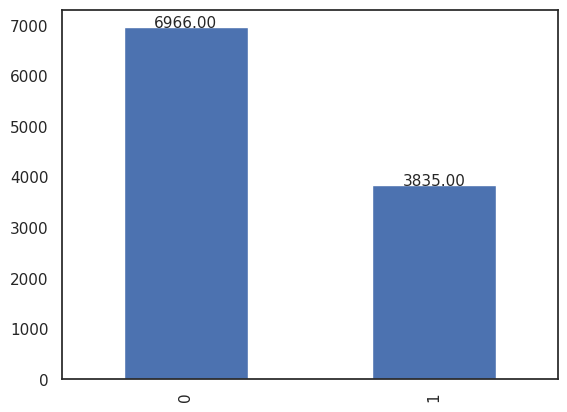

In [ ]:
import seaborn as sns
sns.set(style='white')
ax = aa.abuse.value_counts().plot.bar()
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 3), textcoords='offset points')

## Benchmarking

### BETO

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizerFast

In [ ]:
### Load model and tokenizer
### Pretrained models come with their own tokenizer
model = BertForSequenceClassification.from_pretrained('dccuchile/bert-base-spanish-wwm-cased') #
tokenizer = BertTokenizerFast.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchi

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
#test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
train_dataset = TrainDataset(train_encodings, train_labels)
val_dataset = TrainDataset(val_encodings, val_labels)

In [ ]:
resultados = []
for i in range(0,5):
  final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)
  print(final_model)
  resultados.append(final_model)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.114400
1000,0.080500
1500,0.072700
2000,0.043300


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.490173578262329, 'eval_accuracy': 0.7811387900355872, 'eval_f1': 0.6602209944751382, 'eval_f1 macro': 0.7494018358202462, 'eval_precision': 0.6565934065934066, 'eval_recall': 0.6638888888888889, 'eval_runtime': 11.4832, 'eval_samples_per_second': 97.882, 'eval_steps_per_second': 9.84, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.032400
1000,0.052500
1500,0.057500
2000,0.030500


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.8145151138305664, 'eval_accuracy': 0.7882562277580071, 'eval_f1': 0.6712707182320442, 'eval_f1 macro': 0.7575513696147098, 'eval_precision': 0.6675824175824175, 'eval_recall': 0.675, 'eval_runtime': 11.5474, 'eval_samples_per_second': 97.338, 'eval_steps_per_second': 9.786, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.032800
1000,0.039100
1500,0.042000
2000,0.025200


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.7603907585144043, 'eval_accuracy': 0.7873665480427047, 'eval_f1': 0.6774628879892037, 'eval_f1 macro': 0.7594348282016357, 'eval_precision': 0.6587926509186351, 'eval_recall': 0.6972222222222222, 'eval_runtime': 11.4941, 'eval_samples_per_second': 97.789, 'eval_steps_per_second': 9.831, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.013000
1000,0.030200
1500,0.044700
2000,0.026900


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.8408585786819458, 'eval_accuracy': 0.7749110320284698, 'eval_f1': 0.6510344827586207, 'eval_f1 macro': 0.7424574908868613, 'eval_precision': 0.6465753424657534, 'eval_recall': 0.6555555555555556, 'eval_runtime': 11.4644, 'eval_samples_per_second': 98.042, 'eval_steps_per_second': 9.857, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.017600
1000,0.044100
1500,0.039100
2000,0.018200


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.748659372329712, 'eval_accuracy': 0.791814946619217, 'eval_f1': 0.6776859504132232, 'eval_f1 macro': 0.7619704390699493, 'eval_precision': 0.6721311475409836, 'eval_recall': 0.6833333333333333, 'eval_runtime': 11.4668, 'eval_samples_per_second': 98.022, 'eval_steps_per_second': 9.855, 'epoch': 3.0}


In [ ]:
resultados

[{'eval_loss': 1.490173578262329,
  'eval_accuracy': 0.7811387900355872,
  'eval_f1': 0.6602209944751382,
  'eval_f1 macro': 0.7494018358202462,
  'eval_precision': 0.6565934065934066,
  'eval_recall': 0.6638888888888889,
  'eval_runtime': 11.4832,
  'eval_samples_per_second': 97.882,
  'eval_steps_per_second': 9.84,
  'epoch': 3.0},
 {'eval_loss': 1.8145151138305664,
  'eval_accuracy': 0.7882562277580071,
  'eval_f1': 0.6712707182320442,
  'eval_f1 macro': 0.7575513696147098,
  'eval_precision': 0.6675824175824175,
  'eval_recall': 0.675,
  'eval_runtime': 11.5474,
  'eval_samples_per_second': 97.338,
  'eval_steps_per_second': 9.786,
  'epoch': 3.0},
 {'eval_loss': 1.7603907585144043,
  'eval_accuracy': 0.7873665480427047,
  'eval_f1': 0.6774628879892037,
  'eval_f1 macro': 0.7594348282016357,
  'eval_precision': 0.6587926509186351,
  'eval_recall': 0.6972222222222222,
  'eval_runtime': 11.4941,
  'eval_samples_per_second': 97.789,
  'eval_steps_per_second': 9.831,
  'epoch': 3.0},
 

In [ ]:
final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)
final_model

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.582000
1000,0.429600
1500,0.361100
2000,0.188400


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 0.8746702075004578,
 'eval_accuracy': 0.7811387900355872,
 'eval_f1': 0.654494382022472,
 'eval_f1 macro': 0.747169066011236,
 'eval_precision': 0.6619318181818182,
 'eval_recall': 0.6472222222222223,
 'eval_runtime': 11.4248,
 'eval_samples_per_second': 98.383,
 'eval_steps_per_second': 9.891,
 'epoch': 3.0}

### ROBERTA

In [ ]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
tokenizer = RobertaTokenizerFast.from_pretrained('PlanTL-GOB-ES/roberta-base-bne')
model = RobertaForSequenceClassification.from_pretrained('PlanTL-GOB-ES/roberta-base-bne')

Some weights of the model checkpoint at PlanTL-GOB-ES/roberta-base-bne were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
train_dataset = TrainDataset(train_encodings, train_labels)
val_dataset = TrainDataset(val_encodings, val_labels)

In [ ]:
resultados_roberta = []
for i in range(0,5):
  final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)
  print(final_model)
  resultados_roberta.append(final_model)
resultados_roberta

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.575300
1000,0.403700
1500,0.309300
2000,0.106200


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 0.9700766801834106, 'eval_accuracy': 0.7873665480427047, 'eval_f1': 0.6783310901749663, 'eval_f1 macro': 0.7597635517320014, 'eval_precision': 0.6579634464751958, 'eval_recall': 0.7, 'eval_runtime': 20.8277, 'eval_samples_per_second': 53.966, 'eval_steps_per_second': 5.425, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.060300
1000,0.102700
1500,0.073100
2000,0.021100


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.3952354192733765, 'eval_accuracy': 0.7846975088967971, 'eval_f1': 0.6601123595505618, 'eval_f1 macro': 0.7512801381086143, 'eval_precision': 0.6676136363636364, 'eval_recall': 0.6527777777777778, 'eval_runtime': 20.6633, 'eval_samples_per_second': 54.396, 'eval_steps_per_second': 5.469, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.036900
1000,0.068800
1500,0.067300
2000,0.017300


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.523494005203247, 'eval_accuracy': 0.7829181494661922, 'eval_f1': 0.6582633053221288, 'eval_f1 macro': 0.7496010138083917, 'eval_precision': 0.6638418079096046, 'eval_recall': 0.6527777777777778, 'eval_runtime': 20.741, 'eval_samples_per_second': 54.192, 'eval_steps_per_second': 5.448, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.049500
1000,0.057100


Step,Training Loss
500,0.049500
1000,0.057100
1500,0.041400
2000,0.007800


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.7856683731079102, 'eval_accuracy': 0.7749110320284698, 'eval_f1': 0.6461538461538462, 'eval_f1 macro': 0.7405589843946008, 'eval_precision': 0.6507042253521127, 'eval_recall': 0.6416666666666667, 'eval_runtime': 20.6734, 'eval_samples_per_second': 54.369, 'eval_steps_per_second': 5.466, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.030000
1000,0.053600
1500,0.030800
2000,0.009800


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.656633973121643, 'eval_accuracy': 0.7846975088967971, 'eval_f1': 0.6648199445983379, 'eval_f1 macro': 0.7531177049335072, 'eval_precision': 0.6629834254143646, 'eval_recall': 0.6666666666666666, 'eval_runtime': 20.79, 'eval_samples_per_second': 54.064, 'eval_steps_per_second': 5.435, 'epoch': 3.0}


[{'eval_loss': 0.9700766801834106,
  'eval_accuracy': 0.7873665480427047,
  'eval_f1': 0.6783310901749663,
  'eval_f1 macro': 0.7597635517320014,
  'eval_precision': 0.6579634464751958,
  'eval_recall': 0.7,
  'eval_runtime': 20.8277,
  'eval_samples_per_second': 53.966,
  'eval_steps_per_second': 5.425,
  'epoch': 3.0},
 {'eval_loss': 1.3952354192733765,
  'eval_accuracy': 0.7846975088967971,
  'eval_f1': 0.6601123595505618,
  'eval_f1 macro': 0.7512801381086143,
  'eval_precision': 0.6676136363636364,
  'eval_recall': 0.6527777777777778,
  'eval_runtime': 20.6633,
  'eval_samples_per_second': 54.396,
  'eval_steps_per_second': 5.469,
  'epoch': 3.0},
 {'eval_loss': 1.523494005203247,
  'eval_accuracy': 0.7829181494661922,
  'eval_f1': 0.6582633053221288,
  'eval_f1 macro': 0.7496010138083917,
  'eval_precision': 0.6638418079096046,
  'eval_recall': 0.6527777777777778,
  'eval_runtime': 20.741,
  'eval_samples_per_second': 54.192,
  'eval_steps_per_second': 5.448,
  'epoch': 3.0},
 {'

### ELECTRA

In [ ]:
from transformers import ElectraForSequenceClassification, ElectraTokenizerFast

model = ElectraForSequenceClassification.from_pretrained("mrm8488/electricidad-base-discriminator")
tokenizer = ElectraTokenizerFast.from_pretrained("mrm8488/electricidad-base-discriminator")

Some weights of the model checkpoint at mrm8488/electricidad-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at mrm8488/electricidad-base-discriminator and are newly initialized: ['

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
train_dataset = TrainDataset(train_encodings, train_labels)
val_dataset = TrainDataset(val_encodings, val_labels)

In [ ]:
resultados_electra = []
for i in range(0,3):
  final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)
  print(final_model)
  resultados_electra.append(final_model)
resultados_electra

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.631500
1000,0.479300
1500,0.417300
2000,0.288100


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 0.6645931601524353, 'eval_accuracy': 0.7624555160142349, 'eval_f1': 0.644474034620506, 'eval_f1 macro': 0.7330586605968261, 'eval_precision': 0.618925831202046, 'eval_recall': 0.6722222222222223, 'eval_runtime': 12.096, 'eval_samples_per_second': 92.923, 'eval_steps_per_second': 9.342, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


Step,Training Loss
500,0.231100
1000,0.153300
1500,0.118900
2000,0.078800


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.3510334491729736, 'eval_accuracy': 0.7588967971530249, 'eval_f1': 0.6466753585397654, 'eval_f1 macro': 0.7318454442935154, 'eval_precision': 0.6093366093366094, 'eval_recall': 0.6888888888888889, 'eval_runtime': 12.2501, 'eval_samples_per_second': 91.755, 'eval_steps_per_second': 9.224, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.071400
1000,0.053400
1500,0.038900
2000,0.038100


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 1.7270113229751587, 'eval_accuracy': 0.7624555160142349, 'eval_f1': 0.6500655307994758, 'eval_f1 macro': 0.735133775500748, 'eval_precision': 0.6153846153846154, 'eval_recall': 0.6888888888888889, 'eval_runtime': 12.3617, 'eval_samples_per_second': 90.926, 'eval_steps_per_second': 9.141, 'epoch': 3.0}


[{'eval_loss': 0.6645931601524353,
  'eval_accuracy': 0.7624555160142349,
  'eval_f1': 0.644474034620506,
  'eval_f1 macro': 0.7330586605968261,
  'eval_precision': 0.618925831202046,
  'eval_recall': 0.6722222222222223,
  'eval_runtime': 12.096,
  'eval_samples_per_second': 92.923,
  'eval_steps_per_second': 9.342,
  'epoch': 3.0},
 {'eval_loss': 1.3510334491729736,
  'eval_accuracy': 0.7588967971530249,
  'eval_f1': 0.6466753585397654,
  'eval_f1 macro': 0.7318454442935154,
  'eval_precision': 0.6093366093366094,
  'eval_recall': 0.6888888888888889,
  'eval_runtime': 12.2501,
  'eval_samples_per_second': 91.755,
  'eval_steps_per_second': 9.224,
  'epoch': 3.0},
 {'eval_loss': 1.7270113229751587,
  'eval_accuracy': 0.7624555160142349,
  'eval_f1': 0.6500655307994758,
  'eval_f1 macro': 0.735133775500748,
  'eval_precision': 0.6153846153846154,
  'eval_recall': 0.6888888888888889,
  'eval_runtime': 12.3617,
  'eval_samples_per_second': 90.926,
  'eval_steps_per_second': 9.141,
  'epoc

### BERTIN

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bertin-project/bertin-roberta-base-spanish')
model = AutoModelForSequenceClassification.from_pretrained("bertin-project/bertin-roberta-base-spanish")

Some weights of the model checkpoint at bertin-project/bertin-roberta-base-spanish were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at bertin-project/bertin-roberta-base-spanish and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'clas

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
train_dataset = TrainDataset(train_encodings, train_labels)
val_dataset = TrainDataset(val_encodings, val_labels)

In [ ]:
resultados_bertin = []
for i in range(0,5):
  final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)
  print(final_model)
  resultados_bertin.append(final_model)
resultados_bertin

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.663000
1000,0.605600
1500,0.563700
2000,0.454100


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 0.6036025285720825, 'eval_accuracy': 0.7295373665480427, 'eval_f1': 0.5789473684210527, 'eval_f1 macro': 0.6898668690073808, 'eval_precision': 0.5773480662983426, 'eval_recall': 0.5805555555555556, 'eval_runtime': 20.4848, 'eval_samples_per_second': 54.87, 'eval_steps_per_second': 5.516, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.407200
1000,0.425500
1500,0.367000
2000,0.243500


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


{'eval_loss': 0.8333122134208679, 'eval_accuracy': 0.7348754448398577, 'eval_f1': 0.6005361930294907, 'eval_f1 macro': 0.7010670312684071, 'eval_precision': 0.5803108808290155, 'eval_recall': 0.6222222222222222, 'eval_runtime': 20.4539, 'eval_samples_per_second': 54.953, 'eval_steps_per_second': 5.525, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


### ROBERTUITO

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('pysentimiento/robertuito-base-uncased', truncation=True, padding=True, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-base-uncased")

Downloading:   0%|          | 0.00/323 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/838k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/677 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/415M [00:00<?, ?B/s]

Some weights of the model checkpoint at pysentimiento/robertuito-base-uncased were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length = 128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length = 128) 
train_dataset = TrainDataset(train_encodings, train_labels)
val_dataset = TrainDataset(val_encodings, val_labels)

In [ ]:
resultados_robertuito = []
for i in range(0,5):
    print(i)
    final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)
    print(final_model)
    resultados_robertuito.append(final_model)
resultados_robertuito

0


***** Running training *****
  Num examples = 7697
  Num Epochs = 3
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 2310


Step,Training Loss
500,0.551500
1000,0.389200
1500,0.336900
2000,0.212800


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


Configuration saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/config.json
Model weights saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/pytorch_model.bin
tokenizer config file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/tokenizer_config.json
Special tokens file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1124
  Batch size = 10


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 7697
  Num Epochs = 3
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 2310


{'eval_loss': 0.6912722587585449, 'eval_accuracy': 0.8033807829181495, 'eval_f1': 0.6865248226950356, 'eval_f1 macro': 0.77164867187895, 'eval_precision': 0.7014492753623188, 'eval_recall': 0.6722222222222223, 'eval_runtime': 6.1319, 'eval_samples_per_second': 183.305, 'eval_steps_per_second': 18.428, 'epoch': 3.0}
1


Step,Training Loss
500,0.147100
1000,0.079600
1500,0.077300
2000,0.046000


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Configuration saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/config.json


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


Model weights saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/pytorch_model.bin
tokenizer config file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/tokenizer_config.json
Special tokens file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1124
  Batch size = 10


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 7697
  Num Epochs = 3
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 2310


{'eval_loss': 1.2785168886184692, 'eval_accuracy': 0.8096085409252669, 'eval_f1': 0.681547619047619, 'eval_f1 macro': 0.7728804085085811, 'eval_precision': 0.7339743589743589, 'eval_recall': 0.6361111111111111, 'eval_runtime': 6.2757, 'eval_samples_per_second': 179.104, 'eval_steps_per_second': 18.006, 'epoch': 3.0}
2


Step,Training Loss
500,0.033900
1000,0.015600
1500,0.026100
2000,0.012500


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Configuration saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/config.json


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


Model weights saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/pytorch_model.bin
tokenizer config file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/tokenizer_config.json
Special tokens file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1124
  Batch size = 10


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 7697
  Num Epochs = 3
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 2310


{'eval_loss': 1.6623541116714478, 'eval_accuracy': 0.8016014234875445, 'eval_f1': 0.6666666666666667, 'eval_f1 macro': 0.7627190204770953, 'eval_precision': 0.7216828478964401, 'eval_recall': 0.6194444444444445, 'eval_runtime': 6.1725, 'eval_samples_per_second': 182.097, 'eval_steps_per_second': 18.307, 'epoch': 3.0}
3


Step,Training Loss
500,0.015000
1000,0.011400
1500,0.013200
2000,0.011900


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Configuration saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/config.json


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


Model weights saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/pytorch_model.bin
tokenizer config file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/tokenizer_config.json
Special tokens file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1124
  Batch size = 10


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 7697
  Num Epochs = 3
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 2310


{'eval_loss': 1.7238343954086304, 'eval_accuracy': 0.8104982206405694, 'eval_f1': 0.6872246696035242, 'eval_f1 macro': 0.7756480718789798, 'eval_precision': 0.7289719626168224, 'eval_recall': 0.65, 'eval_runtime': 6.1796, 'eval_samples_per_second': 181.888, 'eval_steps_per_second': 18.286, 'epoch': 3.0}
4


Step,Training Loss
500,0.006900
1000,0.013500
1500,0.015900
2000,0.006300


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Configuration saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/config.json


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


Model weights saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/pytorch_model.bin
tokenizer config file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/tokenizer_config.json
Special tokens file saved in /content/gdrive/MyDrive/Tesis_Maestria/classifier/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1124
  Batch size = 10


{'eval_loss': 1.8676499128341675, 'eval_accuracy': 0.8096085409252669, 'eval_f1': 0.688953488372093, 'eval_f1 macro': 0.7758870005963029, 'eval_precision': 0.7225609756097561, 'eval_recall': 0.6583333333333333, 'eval_runtime': 6.23, 'eval_samples_per_second': 180.417, 'eval_steps_per_second': 18.138, 'epoch': 3.0}


[{'eval_loss': 0.6912722587585449,
  'eval_accuracy': 0.8033807829181495,
  'eval_f1': 0.6865248226950356,
  'eval_f1 macro': 0.77164867187895,
  'eval_precision': 0.7014492753623188,
  'eval_recall': 0.6722222222222223,
  'eval_runtime': 6.1319,
  'eval_samples_per_second': 183.305,
  'eval_steps_per_second': 18.428,
  'epoch': 3.0},
 {'eval_loss': 1.2785168886184692,
  'eval_accuracy': 0.8096085409252669,
  'eval_f1': 0.681547619047619,
  'eval_f1 macro': 0.7728804085085811,
  'eval_precision': 0.7339743589743589,
  'eval_recall': 0.6361111111111111,
  'eval_runtime': 6.2757,
  'eval_samples_per_second': 179.104,
  'eval_steps_per_second': 18.006,
  'epoch': 3.0},
 {'eval_loss': 1.6623541116714478,
  'eval_accuracy': 0.8016014234875445,
  'eval_f1': 0.6666666666666667,
  'eval_f1 macro': 0.7627190204770953,
  'eval_precision': 0.7216828478964401,
  'eval_recall': 0.6194444444444445,
  'eval_runtime': 6.1725,
  'eval_samples_per_second': 182.097,
  'eval_steps_per_second': 18.307,
  '

## Optimizo hiperparámetros

Del modelo seleccionado: Robertuito


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('pysentimiento/robertuito-base-uncased', truncation=True, padding=True, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-base-uncased")

Some weights of the model checkpoint at pysentimiento/robertuito-base-uncased were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.we

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length = 128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length = 128) 
train_dataset = TrainDataset(train_encodings, train_labels)
val_dataset = TrainDataset(val_encodings, val_labels)

In [ ]:
n_epocs = [2,3,4]
lrs = [2e-5,5e-5]
results = []

for epoc in n_epocs:
    for lr in lrs:
        result = finetune(train_dataset, val_dataset, epoc, lr)
        result['lr'] = lr
        results.append(result)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.550100
1000,0.379400
1500,0.323700


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.252600
1000,0.170100
1500,0.187100


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.060100
1000,0.024600
1500,0.046200
2000,0.080700


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.036300
1000,0.072900
1500,0.080400
2000,0.052200


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.013700
1000,0.008200
1500,0.008100
2000,0.013800
2500,0.015700
3000,0.009100


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.023100
1000,0.068300
1500,0.101400
2000,0.062100
2500,0.032500
3000,0.007600


In [ ]:
pd.DataFrame(results)

,eval_loss,eval_accuracy,eval_f1,eval_f1 macro,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,lr
0,0.449134,0.814057,0.704385,0.784379,0.717579,0.691667,8.0998,138.769,13.951,2.0,0.00002
1,0.841200,0.811388,0.709589,0.784966,0.700000,0.719444,8.0563,139.519,14.026,2.0,0.00005
2,1.313987,0.812278,0.698140,0.780962,0.719764,0.677778,8.0306,139.964,14.071,3.0,0.00002
3,1.444408,0.798932,0.681690,0.767373,0.691429,0.672222,7.9753,140.936,14.169,3.0,0.00005
4,1.732680,0.805160,0.694561,0.775758,0.697479,0.691667,8.2223,136.702,13.743,4.0,0.00002
5,1.693524,0.790036,0.683646,0.763261,0.660622,0.708333,8.1019,138.733,13.947,4.0,0.00005


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
### Train final model with best hyperparameters
final_model = finetune(train_dataset, val_dataset, 3, 2e-05,output_file_path=model_path)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.547400
1000,0.380700
1500,0.329900
2000,0.205700


saving model to  /content/gdrive/MyDrive/Tesis_Maestria/classifier/


In [ ]:
final_model

{'eval_loss': 0.6832358837127686,
 'eval_accuracy': 0.8113879003558719,
 'eval_f1': 0.698005698005698,
 'eval_f1 macro': 0.7804388127803392,
 'eval_precision': 0.716374269005848,
 'eval_recall': 0.6805555555555556,
 'eval_runtime': 7.4337,
 'eval_samples_per_second': 151.202,
 'eval_steps_per_second': 15.201,
 'epoch': 3.0}

## Test data

In [29]:
model_path

'/content/gdrive/MyDrive/Tesis_Maestria/classifier/'

In [30]:
# Cargo tokenizer y modelo finetuneado
tokenizer_fine = AutoTokenizer.from_pretrained(model_path, local_files_only=True)
model_fine = AutoModelForSequenceClassification.from_pretrained(model_path, local_files_only=True)


In [31]:
len(test_texts)

1980

In [32]:
test_encodings = tokenizer_fine(test_texts, truncation=True, padding=True, max_length = 128)

In [33]:
test_pred = []
test_prob = []

for i in np.arange(0,1980,50):
    print(i)
    try:
        inputs = tokenizer_fine(test_texts[i:i+50], padding=True, truncation=True, max_length=128, return_tensors="pt")#.to("cuda")
        tipo = model_fine(**inputs)[0].softmax(1).argmax(axis=1) ### Remove the argmax to look at probabilities
        test_pred += tipo.tolist()
        test_prob += model_fine(**inputs)[0].softmax(1).tolist()
    except:
        pass

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950


In [34]:
test_df = pd.DataFrame({'text':test_texts,"actual":test_labels[:len(test_pred)],'predicted':test_pred, 'prob':test_prob})

precision, recall, f1, _ = precision_recall_fscore_support(test_df.actual, test_df.predicted, average='binary')
acc = accuracy_score(test_df.actual, test_df.predicted)
f1_macro = f1_score(test_df.actual, test_df.predicted, average='macro')
print('precision: ',precision)
print('recall: ',recall)
print('f1: ',f1)
print('f1 macro:' ,f1_macro)
print('acc: ',acc)

precision:  0.7154882154882155
recall:  0.6888168557536467
f1:  0.7018992568125517
f1 macro: 0.7852893883189713
acc:  0.8176767676767677


In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(test_labels, test_pred).ravel()
(tn, fp, fn, tp)

(1194, 169, 192, 425)

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()

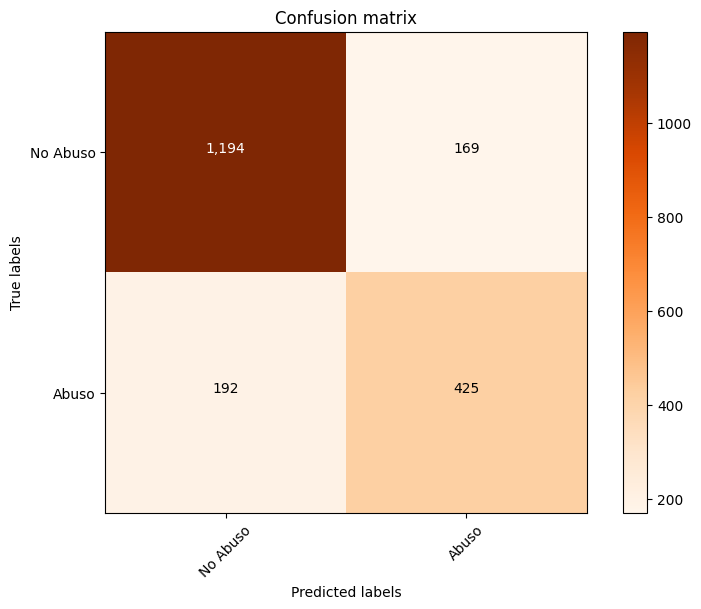

In [ ]:
target_names = ('No Abuso', 'Abuso')
cm = confusion_matrix(test_labels, test_pred)
plot_confusion_matrix(cm, target_names)

In [35]:
test_df.to_csv(path+"results/test_analysis.csv", index = False)